In [1]:
# !pip install -r requirements.txt

In [2]:
%matplotlib widget
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mplcursors import cursor
import matplotlib
import textwrap

df = pd.read_excel("SAP Datasets.xlsx")
df = df.dropna(how="all", subset=map(lambda n:str(n), range(2000, 2024))) # remove statistic if all time-series columns are null
df = df.drop(columns=["Country Code", "short description", "long description", "Indicator Code", "Unit of measure"]) # irrelevent / null columns
df

,Country Name,Indicator Name,Topic,2000,2001,2002,2003,2004,2005,2006,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,Control of Corruption: Estimate,Public Sector: Policy & institutions,NaN,NaN,NaN,NaN,1.165965,1.269663,1.251313,...,1.014232,1.248461,1.232735,1.239377,1.207429,1.174703,1.199392,0.801611,0.756785,NaN
2,Afghanistan,Control of Corruption: Estimate,Public Sector: Policy & institutions,-1.271724,NaN,-1.251137,-1.344180,-1.350647,-1.447252,-1.446292,...,-1.364743,-1.354240,-1.540353,-1.531910,-1.502881,-1.419499,-1.493700,-1.152327,-1.183776,NaN
4,Angola,Control of Corruption: Estimate,Public Sector: Policy & institutions,-1.197514,NaN,-1.155493,-1.335463,-1.377569,-1.323182,-1.241038,...,-1.457798,-1.427323,-1.483337,-1.444333,-1.199251,-1.058418,-0.938673,-0.651610,-0.601941,NaN
5,Albania,Control of Corruption: Estimate,Public Sector: Policy & institutions,-0.855564,NaN,-0.845341,-0.853787,-0.723732,-0.813264,-0.790545,...,-0.586141,-0.544385,-0.471469,-0.480891,-0.545840,-0.563900,-0.572924,-0.576536,-0.407876,NaN
6,Andorra,Control of Corruption: Estimate,Public Sector: Policy & institutions,1.313404,NaN,1.310744,1.332790,1.119150,1.269663,1.251313,...,1.220709,1.151811,1.159556,1.171758,1.179166,1.176592,1.266005,1.279872,1.270204,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23135,Samoa,Urban population (% of total population),Environment: Density & urbanization,21.977000,22.068,21.941000,21.698000,21.457000,21.218000,20.981000,...,19.149000,18.914000,18.681000,18.452000,18.243000,18.056000,17.889000,17.742000,17.616000,17.508
23137,"Yemen, Rep.",Urban population (% of total population),Environment: Density & urbanization,26.267000,26.787,27.315000,27.849000,28.390000,28.936000,29.490000,...,34.165000,34.777000,35.394000,36.016000,36.642000,37.273000,37.908000,38.546000,39.188000,39.831
23138,South Africa,Urban population (% of total population),Environment: Density & urbanization,56.891000,57.368,57.898000,58.446000,58.993000,59.536000,60.077000,...,64.312000,64.828000,65.341000,65.850000,66.355000,66.856000,67.354000,67.847000,68.335000,68.819
23139,Zambia,Urban population (% of total population),Environment: Density & urbanization,34.802000,35.002,35.475000,35.951000,36.430000,36.911000,37.395000,...,41.382000,41.907000,42.438000,42.976000,43.521000,44.072000,44.629000,45.192000,45.761000,46.335


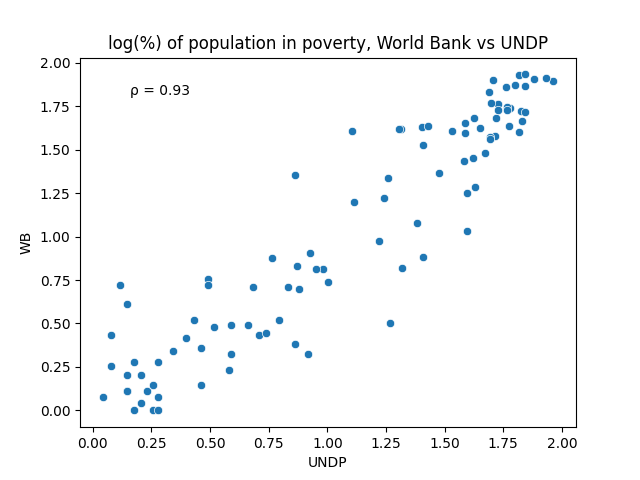

In [3]:
from scipy.stats import pearsonr

def corrfunc(x, y, ax=None, **kws): # code credit: https://stackoverflow.com/questions/38894488/dropping-nan-with-pearsons-r-in-scipy-pandas
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    nans = np.logical_or(np.isnan(x), np.isnan(y))
    r, _ = pearsonr(x[~nans], y[~nans])
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

fig1, ax1 = plt.subplots()

# plot poverty rates from known indicators
UNDP = np.log10(df.loc[df["Indicator Name"] == "Multidimensional poverty headcount ratio (UNDP) (% of population)"]
         .set_index("Country Name").iloc[:,7:]
         .apply(lambda row: row[row.last_valid_index()], axis=1)
         .rename("UNDP")+1)

WB = np.log10(df.loc[df["Indicator Name"] == "Multidimensional poverty headcount ratio (World Bank) (% of population)"]
        .set_index("Country Name").iloc[:,7:]
        .apply(lambda row: row[row.last_valid_index()], axis=1)
        .rename("WB")+1)

# remove NaNs from dataset
UNDP_aligned, WB_aligned = UNDP.align(WB, join='inner')
UNDP_clean = UNDP_aligned.dropna()
WB_clean = WB_aligned.dropna()

plot1 = sns.scatterplot(x=UNDP_clean, y=WB_clean, legend=False, ax=ax1)
corrfunc(x=UNDP_clean, y=WB_clean, ax=ax1)

# for country in UNDP_clean.index:
#     ax.text(x=(UNDP_clean[country]+0.01), 
#             y=(WB_clean[country]-0.004), 
#             s=country, 
#             fontsize=8, 
#             alpha=0.7)
cursor(plot1, hover=True).connect("add", lambda sel: sel.annotation.set_text(WB_clean.index[sel.index]))
plt.title("log(%) of population in poverty, World Bank vs UNDP")
plt.show()

In [4]:
# show all indicators
df["Indicator Name"].unique()

array(['Control of Corruption: Estimate',
       'Multilateral debt service (% of public and publicly guaranteed debt service)',
       'Access to clean fuels and technologies for cooking, rural (% of rural population)',
       'Access to clean fuels and technologies for cooking, urban (% of urban population)',
       'Access to clean fuels and technologies for cooking (% of population)',
       'Access to electricity, rural (% of rural population)',
       'Access to electricity, urban (% of urban population)',
       'Access to electricity (% of population)',
       'Compensation of employees (current LCU)',
       'Compensation of employees (% of expense)',
       'Adjusted savings: education expenditure (current US$)',
       'Adjusted net national income per capita (current US$)',
       'Terms of trade adjustment (constant LCU)',
       'Adequacy of social protection and labor programs (% of total welfare of beneficiary households)',
       'Adequacy of unemployment benefits and 

In [5]:
sqrt = ['Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)']
nolog = [
    'Cause of death, by non-communicable diseases (% of total)',
    'Wage and salaried workers, female (% of female employment) (modeled ILO estimate)',
    'Wage and salaried workers, male (% of male employment) (modeled ILO estimate)',
    'Wage and salaried workers, total (% of total employment) (modeled ILO estimate)',
]
square = [
    'Access to clean fuels and technologies for cooking, rural (% of rural population)',
    'Access to clean fuels and technologies for cooking, urban (% of urban population)',
    'Access to clean fuels and technologies for cooking (% of population)',
    'Access to electricity, rural (% of rural population)',
    'Access to electricity, urban (% of urban population)',
    'Access to electricity (% of population)',
    
    'Births attended by skilled health staff (% of total)',
    'Children in employment, study and work, female (% of female children in employment, ages 7-14)',
    'Children in employment, study and work, male (% of male children in employment, ages 7-14)',
    'Children in employment, study and work (% of children in employment, ages 7-14)',
    'Children in employment, total (% of children ages 7-14)',
    'Children in employment, wage workers, male (% of male children in employment, ages 7-14)',
    'Children in employment, wage workers (% of children in employment, ages 7-14)',
    'Literacy rate, youth female (% of females ages 15-24)',
    'Literacy rate, youth (ages 15-24), gender parity index (GPI)',
    'Literacy rate, youth male (% of males ages 15-24)',
    'Literacy rate, youth total (% of people ages 15-24)',
    'Literacy rate, adult female (% of females ages 15 and above)',
    'Literacy rate, adult male (% of males ages 15 and above)',
    'Literacy rate, adult total (% of people ages 15 and above)',
    'People using at least basic drinking water services (% of population)',
    'People using safely managed drinking water services (% of population)',
    'People using at least basic sanitation services (% of population)',
    'Urban population (% of total population)',
]
pov_col = [
    "Multidimensional poverty headcount ratio (World Bank) (% of population)",
    "Multidimensional poverty headcount ratio (UNDP) (% of population)"
]

In [6]:
epsilon = 0.01 # add a little offset because you can't log 0

# Clean Data
df2 = df.copy()
# row[row.last_valid_index()] # originally we were grabbing the last non-nan cell
years = list(map(lambda n:str(n), list(range(2000, 2024))))
summaries = ["mean_x", "mean_dx", "mean_d2x"]

# take first and second derivative of the data
df2["mean_x"] = df2[years].apply(lambda row: row.mean(), axis=1)
df2["mean_dx"] = df2[years].apply(lambda row: np.diff(row.dropna(), n=1).mean(), axis=1)
df2["mean_d2x"] = df2[years].apply(lambda row: np.diff(row.dropna(), n=2).mean(), axis=1)

# drop time series data
df2 = df2.drop(columns=years)

# use pseudo-log to normalize most statistics
pseudo_log = lambda x: np.arcsinh(x/2)/np.log(10)
allnolog = sqrt + nolog + square + pov_col
logged = df2.groupby("Indicator Name").filter(lambda x: x["mean_x"].min() > 0 and x["Indicator Name"].unique()[0] not in allnolog)
df2.update(logged[summaries].replace({0: epsilon}).apply(lambda col:pseudo_log(col))) # DIRECTLY CHANGES OBJECT!!!

# use pseudo-log to normalize trade surplus / deficit
logged2 = df2.loc[df2["Indicator Name"] == "Terms of trade adjustment (constant LCU)"] # monitary statistics are usually exponential
df2.update(logged2[summaries].apply(lambda col:pseudo_log(col))) # DIRECTLY CHANGES OBJECT!!!

# use square to normalize left-skewed distributions
squared = df2.groupby("Indicator Name").filter(lambda x: x["Indicator Name"].unique()[0] in square)
df2.update((squared["mean_x"] / 100)**2) # DIRECTLY CHANGES OBJECT!!!

# generate contengency table based on normalized statistics
pivot = df2.pivot(index="Country Name", columns="Indicator Name")
df2 = pivot["mean_x"].join(pivot["mean_dx"], rsuffix=", FIRST DERIVATIVE").join(pivot["mean_d2x"], rsuffix=", SECOND DERIVATIVE")
def replacer(col):
    mean = col.mean()
    std = col.std()
    # np.random.normal(mean, std) # originally we replaced the nan's with representitive statistics that had the same mean & std
    # replace with mean if cell is nan or an outlier (z-score > 2.5)
    return col.transform(lambda x: mean if (np.isnan(x) or abs((x - mean)/std) >= 2.5) else x)
    
# delete row or column if (amount of data / 2) == nan
nan_col = df2.isna().sum().sort_values()
nan_idx = df2.isna().sum(axis=1).sort_values()
nan_col = nan_col.loc[nan_col > 130]
nan_idx = nan_idx[nan_idx > 130]

# the poverty indicators don't have first or second derivatives because they only have one value per country
df_pov = df2[pov_col].drop(index=nan_idx.index).rename(columns={pov_col[0]:"WB", pov_col[1]:"UNDP"})
df2 = df2.drop(columns=(list(nan_col.index) + pov_col), index=nan_idx.index).apply(replacer)

# thing = df2.isnull().any()
# thing[thing == True]
print(df2.isnull().values.any()) 
df2

# df2.columns.to_list()
# pivot["mean_d2x"]

/tmp/ipykernel_1243426/3531782332.py:11: RuntimeWarning: Mean of empty slice.
  df2["mean_dx"] = df2[years].apply(lambda row: np.diff(row.dropna(), n=1).mean(), axis=1)
/home/hhwl/miniforge3/envs/cxc/lib/python3.13/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_1243426/3531782332.py:12: RuntimeWarning: Mean of empty slice.
  df2["mean_d2x"] = df2[years].apply(lambda row: np.diff(row.dropna(), n=2).mean(), axis=1)
/home/hhwl/miniforge3/envs/cxc/lib/python3.13/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


False


Indicator Name,Access to clean fuels and technologies for cooking (% of population),"Access to clean fuels and technologies for cooking, rural (% of rural population)","Access to clean fuels and technologies for cooking, urban (% of urban population)",Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Adjusted net national income per capita (current US$),Adjusted savings: education expenditure (current US$),"Adolescent fertility rate (births per 1,000 women ages 15-19)",Adolescents out of school (% of lower secondary school age),...,"Terms of trade adjustment (constant LCU), SECOND DERIVATIVE","Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age), SECOND DERIVATIVE","Unemployment with advanced education (% of total labor force with advanced education), SECOND DERIVATIVE","Unemployment with basic education (% of total labor force with basic education), SECOND DERIVATIVE","Unemployment with intermediate education (% of total labor force with intermediate education), SECOND DERIVATIVE","Unemployment, total (% of total labor force) (national estimate), SECOND DERIVATIVE","Urban population (% of total population), SECOND DERIVATIVE","Wage and salaried workers, female (% of female employment) (modeled ILO estimate), SECOND DERIVATIVE","Wage and salaried workers, male (% of male employment) (modeled ILO estimate), SECOND DERIVATIVE","Wage and salaried workers, total (% of total employment) (modeled ILO estimate), SECOND DERIVATIVE"
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.044448,0.006470,0.425189,0.325942,0.316406,0.782840,2.702385,8.695612,2.057893,0.922540,...,8.713281,-0.000263,-0.796659,-0.684209,-0.683001,-0.266725,0.010273,0.011234,-0.035012,0.025683
Africa Western and Central,0.009573,0.000540,0.041347,0.197104,0.045300,0.605991,3.060213,9.086672,2.087651,0.922540,...,1.445672,-0.008555,-0.051611,-0.012649,-0.002303,-0.560774,-0.000902,0.023686,-0.019933,-0.000189
Albania,0.425189,0.205899,0.706623,0.994529,0.999131,0.975285,3.504623,8.530759,1.236911,0.438939,...,9.120155,-0.033684,-0.058822,-0.061096,-0.021380,0.001998,0.005000,-0.009037,-0.021626,-0.016342
Algeria,0.978207,0.943897,0.997740,0.981995,0.959804,0.993142,3.460934,9.793755,1.036264,0.488767,...,9.859411,-0.003684,-0.051611,-0.012649,-0.002303,0.057754,-0.013500,-0.021531,-0.000328,-0.004633
Angola,0.205406,0.005763,0.607485,0.131674,0.001537,0.382139,3.186075,9.310128,2.199554,1.325245,...,-9.580800,-0.107368,0.393280,-0.012649,0.374428,0.002892,-0.026364,0.044966,-0.028461,0.013800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0.522369,0.439294,0.636055,0.994269,0.986222,0.997132,3.536888,8.679404,1.761598,0.965890,...,6.134218,-0.000168,-0.062529,-0.155708,-0.115051,-0.130765,0.003227,0.010404,-0.004707,0.003398
World,0.356941,0.120514,0.680017,0.718562,0.556290,0.924997,3.871600,9.086672,1.709903,0.922540,...,1.445672,-0.026870,-0.051611,-0.012649,-0.002303,-0.025190,-0.000454,-0.012473,-0.026413,-0.020991
"Yemen, Rep.",0.317777,0.159513,0.858644,0.387154,0.226836,0.878213,2.882514,8.927542,1.893741,1.594273,...,-8.638857,0.000842,-0.051611,-0.012649,-0.002303,-0.148137,0.005591,0.073033,0.020520,0.007065


(4, 221)


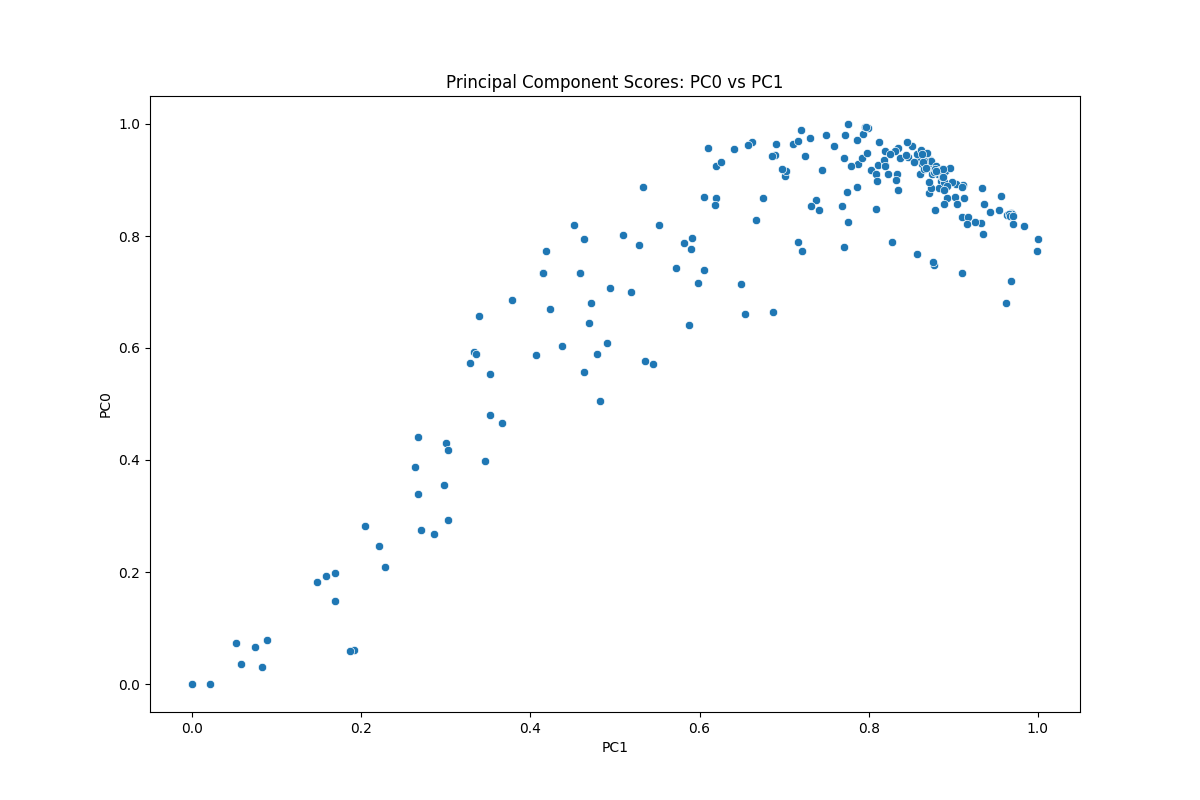

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

fig2, ax2 = plt.subplots(figsize=(12, 8))

# Do PCA
Scaled_data = StandardScaler().fit_transform(df2.T) # PCA expects the features to be on the index
pca = PCA(n_components=4) # we don't be using the last two
x = pca.fit_transform(Scaled_data)
scores = np.matmul(Scaled_data.T, x).T # shape needs to be correct to matrix multiply
print(scores.shape) # (principle components, indicators)

# normalize country scores
scores[0] = ((scores[0] - np.min(scores[0])) / (np.max(scores[0]) - np.min(scores[0])))**2
scores[1] = (-scores[1] - np.min(-scores[1])) / (np.max(-scores[1]) - np.min(-scores[1]))

# the name of the axes might not be completely accurate? it's our best guess
plot2 = sns.scatterplot(y=pd.Series(scores[0]).rename("PC0"),
                        x=pd.Series(scores[1]).rename("PC1"), legend=False, ax=ax2)
plt.title("Principal Component Scores: PC0 vs PC1")
cursor(plot2, hover=True).connect("add", lambda sel: sel.annotation.set_text(df2.index[sel.index])) # add cursor hover
plt.show()

In [8]:
# Percentage each indicator contributes to the index
pd.DataFrame({"Percent":100*np.abs(x.T[0])/np.abs(x.T[0]).sum(), "Value": x.T[0]}, index=df2.columns).sort_values(ascending=False, by="Percent").head(10)
# pd.Series(scores[0], index=df2.index).sort_values().to_dict()

,Percent,Value
Indicator Name,,
"Cause of death, by non-communicable diseases (% of total)",10.337021,110.070310
"Wage and salaried workers, male (% of male employment) (modeled ILO estimate)",8.452371,90.002253
"Wage and salaried workers, total (% of total employment) (modeled ILO estimate)",8.074317,85.976672
"Wage and salaried workers, female (% of female employment) (modeled ILO estimate)",7.546476,80.356124
Women who were first married by age 18 (% of women ages 20-24),3.698596,39.383261
Compensation of employees (current LCU),1.544440,16.445456
"Compensation of employees (current LCU), FIRST DERIVATIVE",1.342262,14.292630
"Compulsory education, duration (years)",1.268850,13.510928
Adjusted savings: education expenditure (current US$),1.250137,13.311663


In [9]:
pd.DataFrame({"Percent":100*np.abs(x.T[1])/np.abs(x.T[1]).sum(), "Value": -x.T[1]}, index=df2.columns).sort_values(ascending=False, by="Percent").head(10)

,Percent,Value
Indicator Name,,
Women who were first married by age 18 (% of women ages 20-24),11.172679,-36.154393
"Wage and salaried workers, female (% of female employment) (modeled ILO estimate)",7.254800,23.476277
"Wage and salaried workers, total (% of total employment) (modeled ILO estimate)",4.068380,13.165135
Compensation of employees (current LCU),2.734822,-8.849789
Women who were first married by age 15 (% of women ages 20-24),2.733113,-8.844256
"Cause of death, by non-communicable diseases (% of total)",2.622606,-8.486660
"Compensation of employees (current LCU), FIRST DERIVATIVE",2.477356,-8.016637
"Births attended by skilled health staff (% of total), FIRST DERIVATIVE",2.322135,-7.514347
Adjusted savings: education expenditure (current US$),1.927543,-6.237462


In [10]:
pd.Series(scores[0], index=df2.index).sort_values(ascending=False).head(10)

Country Name
Middle East & North Africa (excluding high income)      1.000000
Latin America & Caribbean (excluding high income)       0.994477
Latin America & the Caribbean (IDA & IBRD countries)    0.993827
Latin America & Caribbean                               0.993013
World                                                   0.989071
Europe & Central Asia (excluding high income)           0.982790
San Marino                                              0.981243
Grenada                                                 0.979993
Late-demographic dividend                               0.975158
Guyana                                                  0.970538
dtype: float64

In [11]:
pd.Series(scores[0], index=df2.index).sort_values(ascending=False)

Country Name
Middle East & North Africa (excluding high income)      1.000000
Latin America & Caribbean (excluding high income)       0.994477
Latin America & the Caribbean (IDA & IBRD countries)    0.993827
Latin America & Caribbean                               0.993013
World                                                   0.989071
                                                          ...   
Niger                                                   0.058145
Guinea                                                  0.036595
Burkina Faso                                            0.031162
South Sudan                                             0.000049
Central African Republic                                0.000000
Length: 221, dtype: float64

In [12]:
pd.Series(scores[1], index=df2.index).sort_values(ascending=False)

Country Name
Singapore                   1.000000
Qatar                       0.999416
Norway                      0.983401
Oman                        0.970688
Lithuania                   0.970327
                              ...   
Sierra Leone                0.074137
Guinea                      0.057953
Mozambique                  0.051877
Central African Republic    0.021396
South Sudan                 0.000000
Length: 221, dtype: float64

In [13]:
print(pca.explained_variance_ratio_) # how much of data does the pca explain?

[0.87572969 0.06357132 0.01399742 0.00982442]


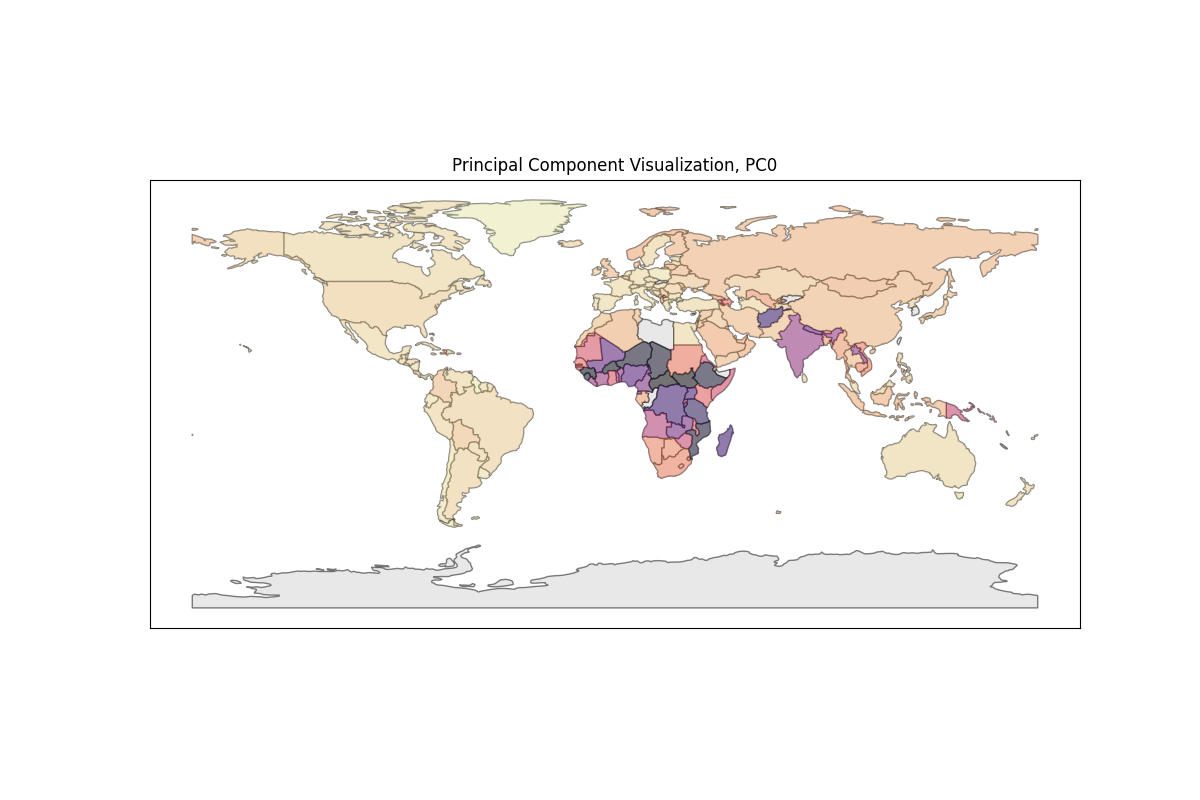

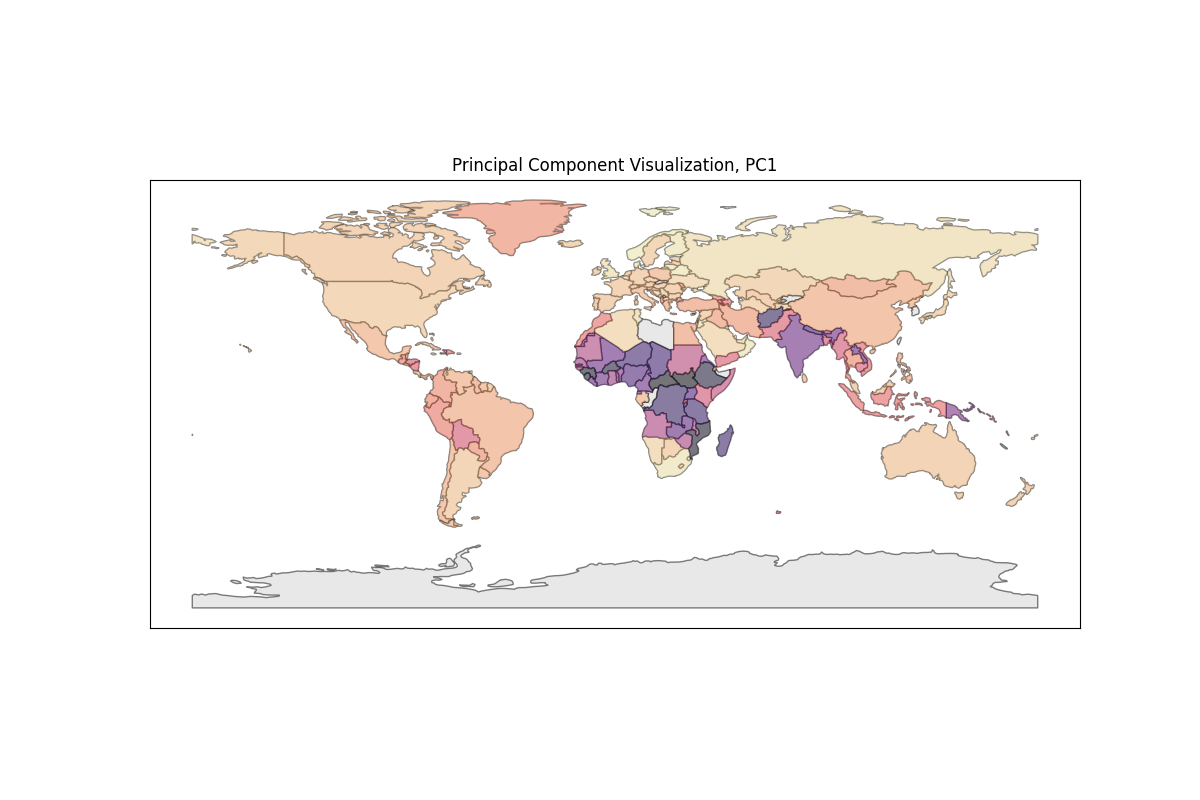

In [14]:
# import the necessary packages
import matplotlib.patches as mpatches
import geopandas as gpd
from thefuzz import process

fig3, ax3 = plt.subplots(figsize=(12, 8))
fig4, ax4 = plt.subplots(figsize=(12, 8))

# geopandas stopped supporting built-in datasets :(
world = gpd.read_file("https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip").set_index("ADMIN")
def world_plots(n, axn):
    # world map outline
    world.plot(
        ax=axn,
        color="lightgray",
        edgecolor="black",
        alpha=0.5
    )
    
    score_series = pd.Series(scores[n], index=df2.index)
    colors = sns.color_palette("magma", as_cmap=True)
    colored_countries = gpd.GeoDataFrame(columns=['geometry', 'score', 'certainty'])
    
    for i in range(len(score_series)):
        # fuzzy match country labels from the SAP dataset to the geographic data
        match = process.extractOne(score_series.index[i], world.index) # (country name, confidence)
        if match[1] < 50: # less than 50% certainty
            continue
        if match[0] not in colored_countries.index or match[1] > colored_countries.loc[match[0], "certainty"]:
            colored_countries.loc[match[0]] = {
                'geometry': world.loc[match[0]].geometry,
                'score': score_series.iloc[i],
                'certainty': match[1]
            }
    
    # plot country colours
    if not colored_countries.empty:
        colored_countries.plot(
            ax=axn,
            column='score',
            cmap=colors,
            alpha=0.5
        )
    
    # turn off axis ticks
    axn.set_xticks([])
    axn.set_yticks([])
    axn.set_title("Principal Component Visualization, PC" + str(n))

world_plots(0, ax3)
world_plots(1, ax4)

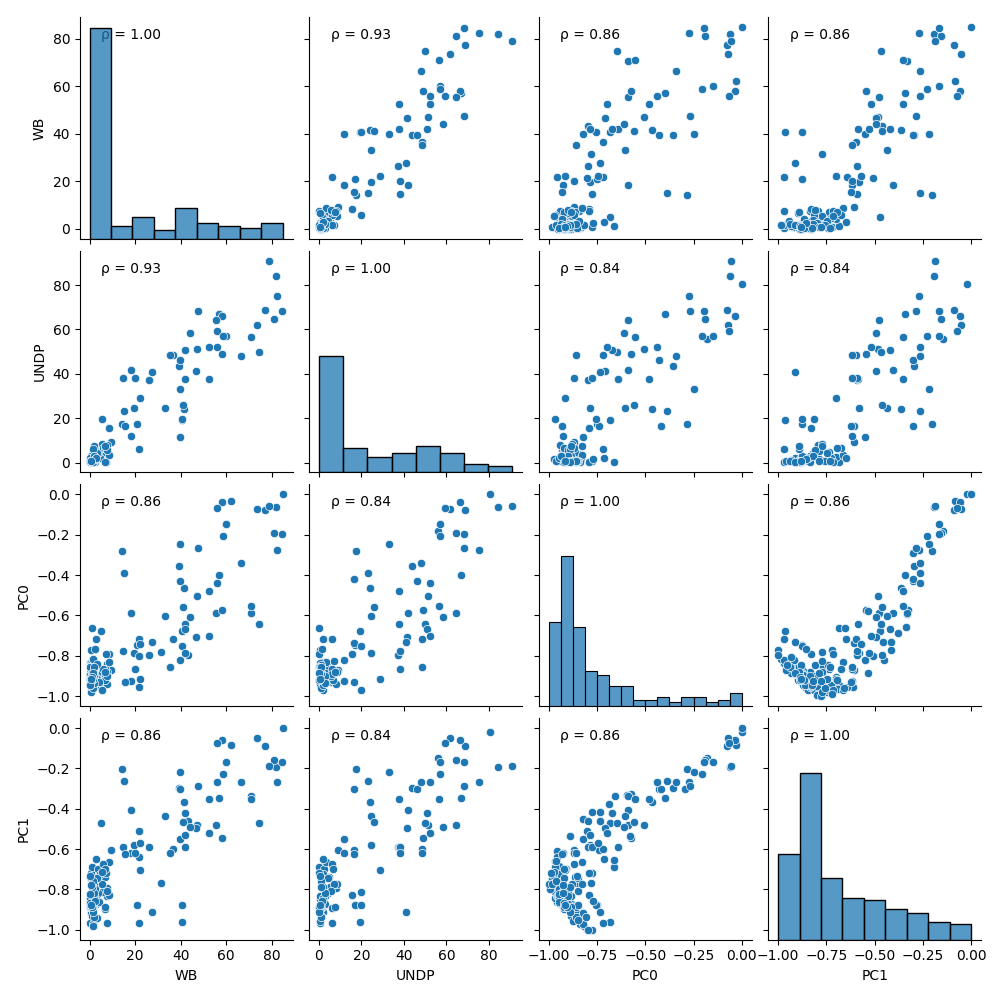

In [15]:
df_pov["PC0"] = -scores[0] # negate due to negative correlation
df_pov["PC1"] = -scores[1]
g = sns.pairplot(df_pov)
g.map(corrfunc)

In [16]:
from scipy import stats
def ttest(x_col, y_col):
    df_ttest = df_pov[[x_col, y_col]].dropna()
    print(stats.linregress(x=df_ttest[x_col], y=df_ttest[y_col]))
ttest("PC0", "WB")
ttest("PC0", "UNDP")
ttest("PC1", "WB")
ttest("PC1", "UNDP")

LinregressResult(slope=np.float64(83.87354651474037), intercept=np.float64(81.8730077379106), rvalue=np.float64(0.8554413553163873), pvalue=np.float64(1.4297426052991338e-45), stderr=np.float64(4.10520358849499), intercept_stderr=np.float64(3.2539726574087084))
LinregressResult(slope=np.float64(77.22232723025391), intercept=np.float64(76.93249353175506), rvalue=np.float64(0.8374026124291323), pvalue=np.float64(1.4304737937893528e-29), stderr=np.float64(4.895697644719876), intercept_stderr=np.float64(3.6255517087606988))
LinregressResult(slope=np.float64(83.58112495150233), intercept=np.float64(75.78652537462534), rvalue=np.float64(0.8563292038734827), pvalue=np.float64(9.247580835060741e-46), stderr=np.float64(4.075055136441435), intercept_stderr=np.float64(2.9617974908352402))
LinregressResult(slope=np.float64(79.73201337767269), intercept=np.float64(73.04517354918342), rvalue=np.float64(0.8399408284828312), pvalue=np.float64(6.665388617076401e-30), stderr=np.float64(5.003493231349854

In [17]:
# # DO NOT RUN unless you want all the other charts to not show up
# # save normalization data as separate files
# import matplotlib
# matplotlib.use('Agg')
# i = 1
# def plot_row(row):
#     global i
#     filename = ''.join([i if ord(i) < 128 and i != "/" else " " for i in row.name]) # make filename safe
#     ax = sns.displot(data=list(row))
#     plt.title("\n".join(textwrap.wrap(row.name + " (normalized)", 50)))
#     plt.savefig("graphs/" + filename + ".png", bbox_inches='tight')
#     plt.clf()
#     i+=1

# # show how successful the normalization was
# df2.T.apply(plot_row, axis=1)
# !zip -r graphs.zip ./graphs

In [18]:
print(pd.DataFrame({"PC0": scores[0], "PC1": scores[1]}, index=df2.index).to_string())

                                                           PC0       PC1
Country Name                                                            
Afghanistan                                           0.182240  0.147421
Africa Western and Central                            0.656990  0.338725
Albania                                               0.772654  0.721076
Algeria                                               0.833691  0.910245
Angola                                                0.505145  0.482538
Argentina                                             0.914223  0.878541
Armenia                                               0.663614  0.687013
Australia                                             0.922654  0.868096
Austria                                               0.937082  0.864289
Azerbaijan                                            0.661500  0.654140
Bahamas, The                                          0.870207  0.902003
Bahrain                                            